# Assignment 5

Apart from Supervised Learning, there is also the subset of Unsupervised Learning algorithms that can be very helpful to make sense of data. Unlike the former, unsupervised learning is when a model is trained without a target (y) to predict for. 
Instead, an attempt is made to subdivide the data based on the features present and compartmentalise it into categories that can be useful to understand. This is especially helpful to make sense of data - and while it is not always easy to interpret the results; that is also an important goal to aim for. 

This dataset reflects that aim with its features on 
- ID (Customer id)
- Sex (Gender)
- Marital Status
- Age
- Education (level of schooling)
- Income
- Occupation

By analysing the data; we aim to understand
- How clustering can be employed to understand data
- Working with K-Means Clustering
- Interpreting and finding the best results

In [1]:
# Ensure that the libraries below have been installed via pip/ pip3 (windows/mac)
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# Run this cell before executing all cells below

### Question 1
When forming clusters - it is important to first ensure (especially with a relatively small dataset) that the features used are meaningful to the clusters created in the data.  

Goal: To remove redundant columns from the dataset.

What to do: Drop the ID column from the dataset using the `.drop` method in dataframes before clustering the data.

Hint: Remember to set the axis parameter to drop correctly!

In [3]:
filename = "customer_data.csv" # change the filepath where necessary

def drop_id(filepath):
    df = pd.read_csv(filepath)
    ### Start of Code ###
    df = df.drop(columns=['ID'])
    ### End of Code ###
    return df

drop_id(filename).head()

,Sex,Marital status,Age,Education,Income,Occupation
0,0,0,67,2,124670,1
1,1,1,22,1,150773,1
2,0,0,49,1,89210,0
3,0,0,45,1,171565,1
4,0,0,53,1,149031,1


Expected Result:
``` 
Sex  Marital status  Age  Education  Income  Occupation
0    0               0   67          2  124670           1
1    1               1   22          1  150773           1
2    0               0   49          1   89210           0
3    0               0   45          1  171565           1
4    0               0   53          1  149031           1
```

### Question 2

The data has fortunately already been encoded - which can be helpful but also somewhat problematic in that we don't *know* what the original values were. Nonetheless, this means that an important step in the data analysis process has been performed - and we can now focus on the other step - standardisation.

Goal: To standardise the necessary columns in the data before forming clusters.

What to do: Use the given “scaler” function to standardise **ONLY** the columns with continuous numerical data in the dataset.

ChatGPT Prompt: When categorical data is encoded; is it ok to standardise the resulting numbers or is it preferred not to? Why?


In [6]:
df = drop_id(filename)

def scaler(data: pd.DataFrame, columns_to_standardise: list):
    # takes in a dataframe and a list
    data = data.copy()
    std_scaler = StandardScaler()
    standardized_values = std_scaler.fit_transform(data[columns_to_standardise])
    standardized_df = pd.DataFrame(standardized_values, columns=columns_to_standardise, index=data.index)
    data[columns_to_standardise] = standardized_df
    return data

def standardise_cols(df):
    continuous_cols = ['Age', 'Income'] # to change (there should be 2 columns in the data!)
    ### Start of Code ###
    df = scaler(df, continuous_cols)

    ### End of Code ###
    return df

standardise_cols(df).head()

,Sex,Marital status,Age,Education,Income,Occupation
0,0,0,2.653614,2,0.097524,1
1,1,1,-1.187132,1,0.782654,1
2,0,0,1.117316,1,-0.833202,0
3,0,0,0.775916,1,1.328386,1
4,0,0,1.458716,1,0.736932,1


Expected Result:
```
Sex  Marital status       Age  Education    Income  Occupation
0    0               0  2.653614          2  0.097524           1
1    1               1 -1.187132          1  0.782654           1
2    0               0  1.117316          1 -0.833202           0
3    0               0  0.775916          1  1.328386           1
4    0               0  1.458716          1  0.736932           1
```


### Question 3

With the data now being standardised - which is especially important for a distance based clustering algorithm like K Means, we can now move onto clustering the data!

Goal: Train a k-means clustering model on the standardised dataset

What to do: Use the `KMeans()` function from sklearn’s library to train a model for clustering. Use the value of k from the 2nd parameter of the `cluster_data` function. Return BOTH the model AND the model's results when it is fitted on the dataset

Hint: Much like for other models, we can use the `fit_predict` method of the model to get the clustering results



In [7]:
df_std = standardise_cols(df)

def cluster_data(df, k = 5):
    model = KMeans(n_clusters = k, random_state = 42)
    res = None
    ### Start of Code ###
    res = model.fit_predict(df)
    ### End of Code ###
    return model, res

cluster_data(df_std)

(KMeans(n_clusters=5, random_state=42),
 array([1, 4, 3, ..., 3, 3, 3], shape=(2000,), dtype=int32))

Expected Result:
```
(KMeans(n_clusters=5, random_state=42), array([1, 4, 3, ..., 3, 3, 3]))
```

### Question 4

Of course, we cannot simply use any value of k once and deem that to be the best one (unless it is known in advance the set number of k's to be had). Instead, multiple values of k should be analysed and the performance of clustering measured as a result. We can do this by looking at the within cluster sum of squares error.

Goal: Evaluate different values of k on the dataset in a visual plot

What to do: Run the function from question 3 (a correct implementation has been given on Coursemology) with different values of k from k = 2 to k = 9 (inclusive) on the data. 

Get the within cluster sum of squared errors for each value of k and upload the resulting plot using the given `plot_WCSS` function. 

Hint: From the resulting model, you can get the within cluster sum of squared errors using the `inertia_` attribute of the model


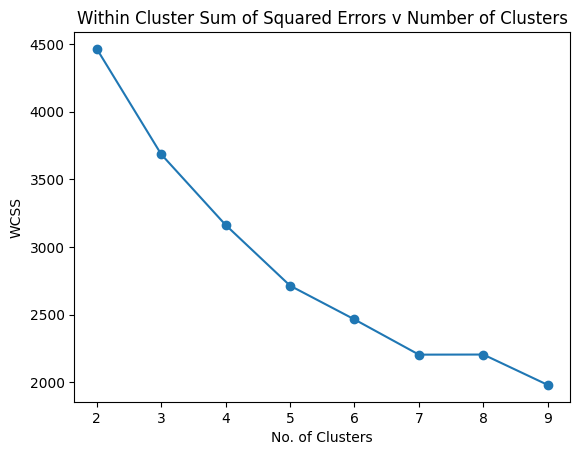

In [9]:
def plot_WCSS(x_vals, y_vals):
    plt.plot(x_vals, y_vals, marker = 'o')
    plt.ylabel("WCSS")
    plt.xlabel("No. of Clusters")
    plt.title("Within Cluster Sum of Squared Errors v Number of Clusters")
    plt.show()

def create_plot(df):
    start_k, end_k = 2, 9
    x_vals = [] # add values of k
    y_vals = [] # add within sum of square results
    ### Start of Code ###
    # 遍历k从2到9
    for k in range(start_k, end_k + 1):
        # 训练K-Means模型
        model, res = cluster_data(df, k)
        
        # 获取WCSS（簇内平方和）
        wcss = model.inertia_
        
        # 记录结果
        x_vals.append(k)
        y_vals.append(wcss)
    
    # 绘制图表
    plot_WCSS(x_vals, y_vals)



    ### End of Code ###
    return

create_plot(df_std)

### Question 5

While plots are indeed useful - they can also be subjective at times, and it can be preferable to compare the results interpreted from a plot with more statistical measures of evidence

Goal: Re-evaluate the model performance using a numerical metric

What to do: Run the `silhouette_score()` function from sklearn’s library on the values of k from 2 to 9 and return the best performing value of k based on the silhouette score.  How does the answer here compare to your judgement based on the plot from Q4?

Hint: `silhouette_score` takes in 2 parameters before returning the score; the actual features (X) and the labels based on the results of k means


In [ ]:
def best_k(df):
    start_k, end_k = 2, 9
    scores = []
    X = df.values # for use in sihouette score fn
    ### Start of Code ###




    ### End of Code ###
    return start_k + np.argmax(scores) # add to start_k since 0th index is val of start_k

best_k(df_std)

Expected Result:

```2```